In [2]:
import pandas as pd
file_path = 'boston_building_inventory_021020.csv'

df = pd.read_csv(file_path)

# data-cleaning
df_res = df[df['building_typology'].isin(['Residential (Mixed-Use)',
                                      'Multi-Family (>= 100 units)',
                                      'Multi-Family (31-99 units)', 
                                      'Multi-Family (7-30 units)', 
                                      'Multi-Family (4-6 units)'])]
df_res = df_res.dropna(subset=['yr_built'])
df_res = df_res.dropna(subset=['gross_area'])
df_res = df_res.dropna(subset=['total_site_energy_kbtu'])
df_res = df_res.dropna(subset=['num_floors'])
df_res = df_res[df_res['gross_area'] != 0]
df_res = df_res[df_res['num_bldgs'] == 1]

df_res

,id,pid_long,cm_id,building_typology,building_subtypology,use_class,sqft_class,year_built_class,st_num,st_name,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
1,31076,304850000,3.048500e+08,Residential (Mixed-Use),"Residential (Mixed-Use), 1980-present",Residential (Mixed-Use),">= 100,000 sqft",1980-present,NaN,NaN,...,f,t,f,f,f,f,f,f,t,2
7,89212,302975000,3.029750e+08,Multi-Family (>= 100 units),"Multi-Family (>= 100 units), 1980-present",Residential,">= 100,000 sqft",1980-present,NaN,NaN,...,f,t,f,f,f,f,f,f,t,3
11,93865,302970000,3.029700e+08,Multi-Family (>= 100 units),"Multi-Family (>= 100 units), 1980-present",Residential,">= 100,000 sqft",1980-present,NaN,NaN,...,f,t,f,f,f,f,f,f,t,3
13,62844,2102464000,2.102464e+09,Multi-Family (>= 100 units),"Multi-Family (>= 100 units), 1980-present",Residential,">= 100,000 sqft",1980-present,NaN,NaN,...,t,f,f,f,f,f,f,f,t,3
15,68323,501185000,5.011850e+08,Multi-Family (31-99 units),"Multi-Family (31-99 units), 1980-present",Residential,">= 100,000 sqft",1980-present,NaN,NaN,...,f,f,f,f,f,f,f,f,t,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,8160,1202220000,NaN,Residential (Mixed-Use),"Residential (Mixed-Use), 1915-1949",Residential (Mixed-Use),"< 25,000 sqft",1915-1949,124 128,RUTHVEN,...,f,f,f,f,f,f,f,f,f,0
978,83690,1700075000,NaN,Residential (Mixed-Use),"Residential (Mixed-Use), Pre-1915",Residential (Mixed-Use),"< 25,000 sqft",Pre-1915,18,ALGONQUIN,...,f,f,f,f,f,f,f,f,f,0
987,50228,1001390000,NaN,Multi-Family (4-6 units),"Multi-Family (4-6 units), Pre-1915",Residential,"< 25,000 sqft",Pre-1915,8 14,S HUNTINGTON,...,f,f,f,f,f,f,f,f,f,0
988,11937,1202208000,NaN,Residential (Mixed-Use),"Residential (Mixed-Use), 1915-1949",Residential (Mixed-Use),"35,000-49,999 sqft",1915-1949,55,ELM HILL,...,f,f,f,f,f,f,f,f,f,0


In [2]:
# create functions that can be called on later
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Floor Area (sqft)
def Histogram(file,variable,variable_name,ylable):
    plt.hist(file[variable].dropna(), bins=100)
    plt.title('Distribution of ' + variable_name + ' for Residential Properties')
    plt.xlabel(variable_name)
    plt.ylabel(ylable)
    plt.show()

#Boxplot with scatterplot
def Boxplot(file,variable,xlable,ylable): 
    '''file is df; variale is name of column in string'''
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=file[variable].dropna(), color='lightblue')
    sns.stripplot(x=file[variable].dropna(), color='blue', alpha=0.5, jitter=True)
    plt.title('Boxplot with Underlying Data Points of ' + xlable + ' for Residential Properties')
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.show()

## 1. Create Site EUI variable

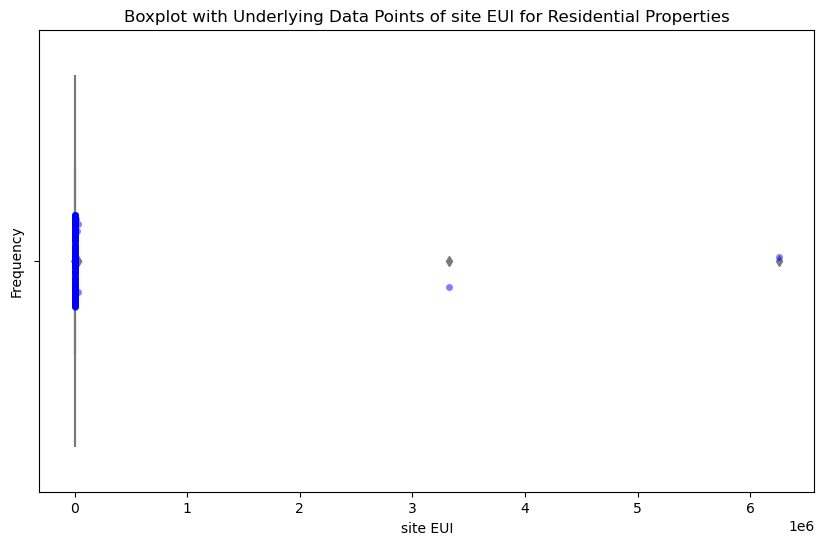

In [3]:
# Calculate EUI
df_res.loc[:, 'site_EUI'] = df_res.loc[:, 'total_site_energy_kbtu'] / df_res.loc[:, 'gross_area']

# Boxplot with scatterplot of Floor Area (ft2)
Boxplot(df_res,
        'site_EUI',
       'site EUI',
       'Frequency')

## 2. Visualizing the Variables

### Site EUI

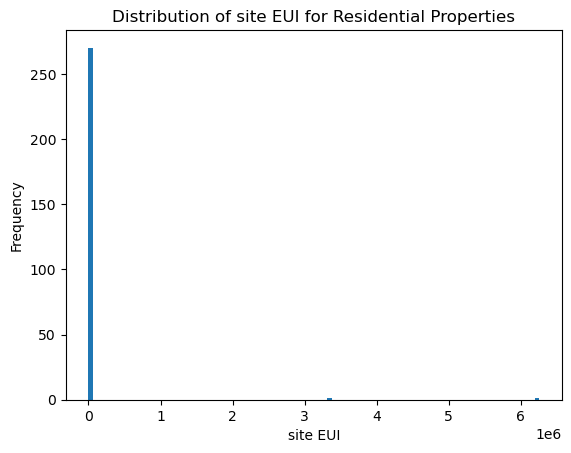

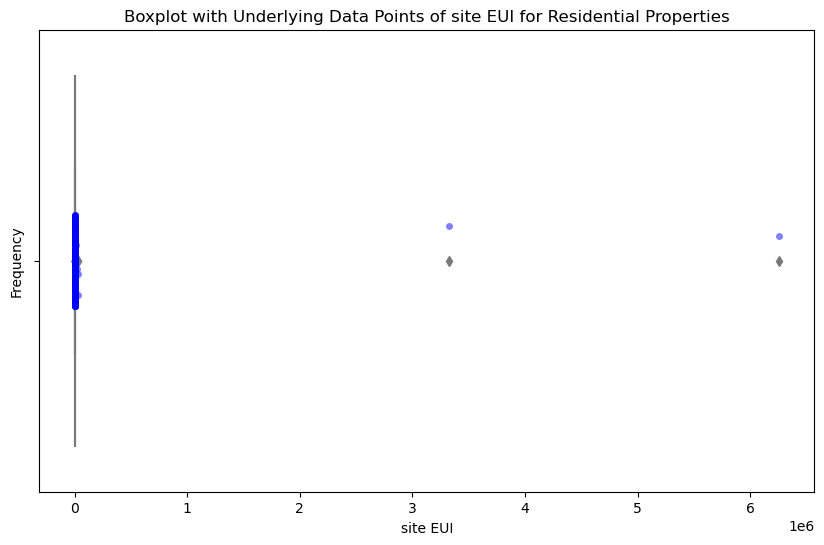

In [4]:
# Histogram of Site EUI
Histogram(df_res,
          'site_EUI',
          'site EUI',
          'Frequency')

# Boxplot with scatterplot of Floor Area (ft2)
Boxplot(df_res,
        'site_EUI',
       'site EUI',
       'Frequency')

### 1) Building Age (yr_built)

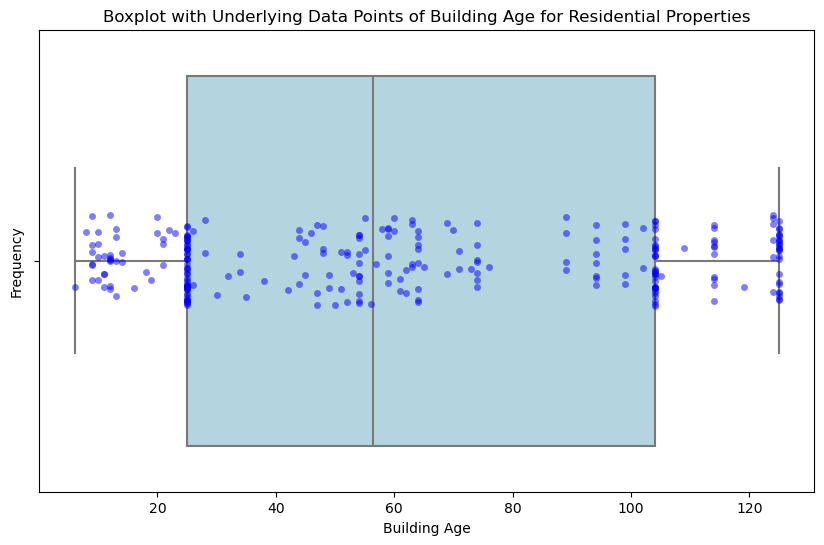

In [5]:
# caluculate building age
import datetime
current_year = datetime.datetime.now().year
df_res.loc[:, 'bldg_age'] = current_year - df_res.loc[:, 'yr_built']

# Boxplot with scatterplot of the 'bldg_age'
Boxplot(df_res,
          'bldg_age',
          'Building Age',
          'Frequency')

### 2) Floor Area (gross_area)

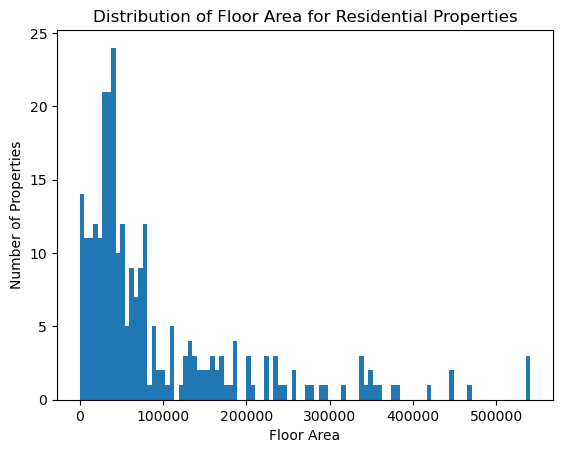

In [6]:
# Histogram of Floor Area (sqft)
Histogram(df_res,
          'gross_area',
          'Floor Area',
          'Number of Properties')

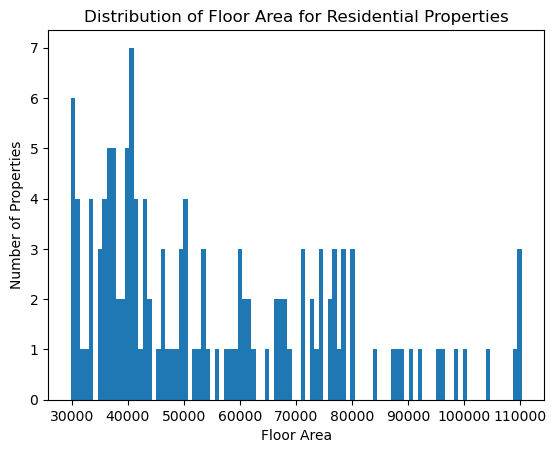

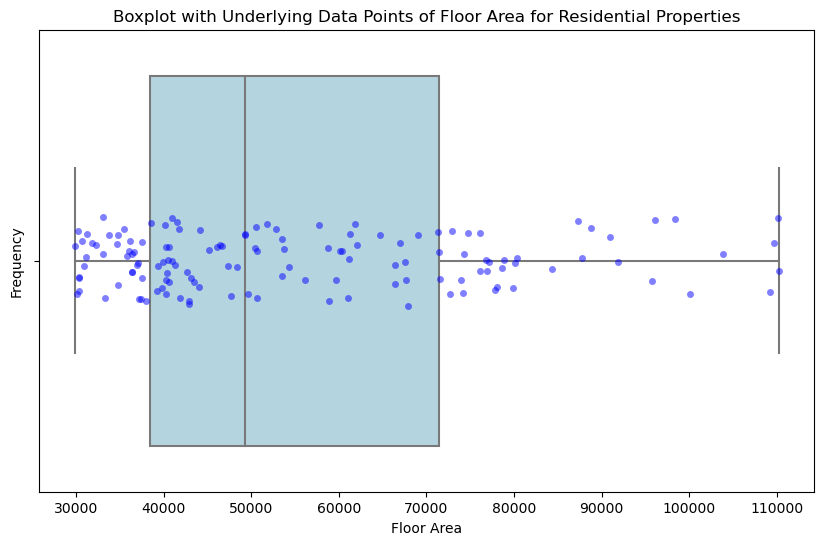

In [7]:
# filtering outliers
lower_AREA = df_res['gross_area'].quantile(0.25)
upper_AREA = df_res['gross_area'].quantile(0.75)
df_res_area = df_res[(df_res['gross_area']< upper_AREA)&
                    (df_res['gross_area']> lower_AREA)]

# Histogram of Floor Area (sqft)
Histogram(df_res_area,
          'gross_area',
          'Floor Area',
          'Number of Properties')
# Boxplot with scatterplot of Floor Area (ft2)
Boxplot(df_res_area,
        'gross_area',
       'Floor Area',
       'Frequency')

### 3) Number of Floors (num_floors)

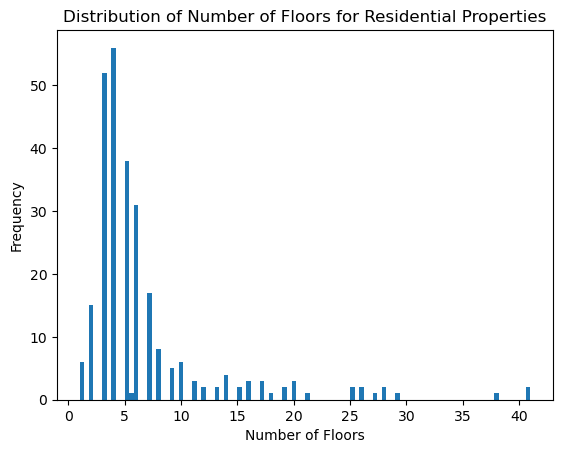

In [8]:
# Histogram of Floor Area (sqft)
Histogram(df_res,
          'num_floors',
          'Number of Floors',
          'Frequency')

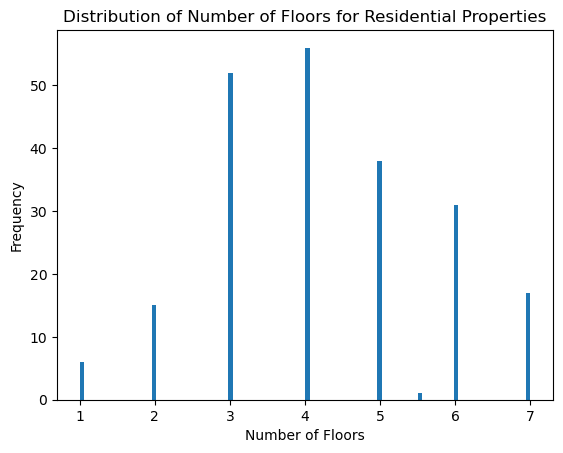

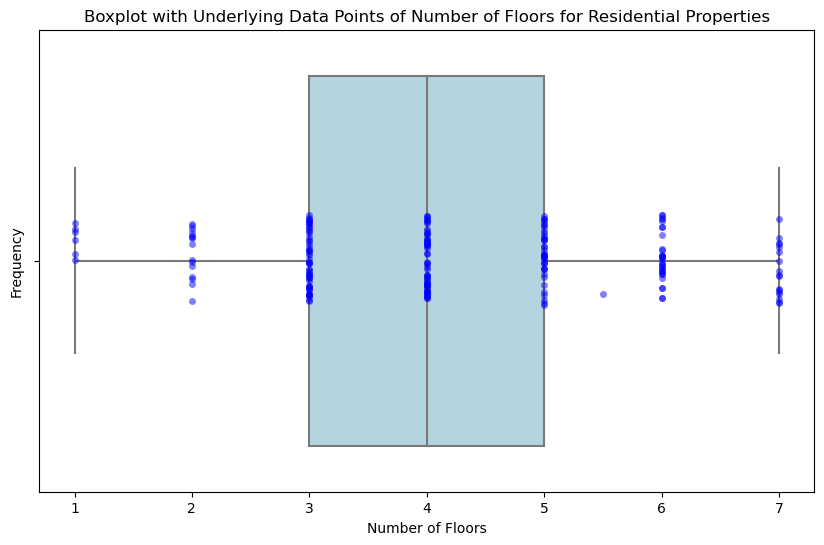

In [9]:
# filtering outliers
upper_floor = df_res['num_floors'].quantile(0.8)
df_res_nf = df_res[(df_res['num_floors'] < upper_floor)]

# Histogram of Floor Area (sqft)
Histogram(df_res_nf,
          'num_floors',
          'Number of Floors',
          'Frequency')
# Boxplot with scatterplot of Floor Area (ft2)
Boxplot(df_res_nf,
        'num_floors',
       'Number of Floors',
       'Frequency')

## 3. Cleaning: filtering outliers

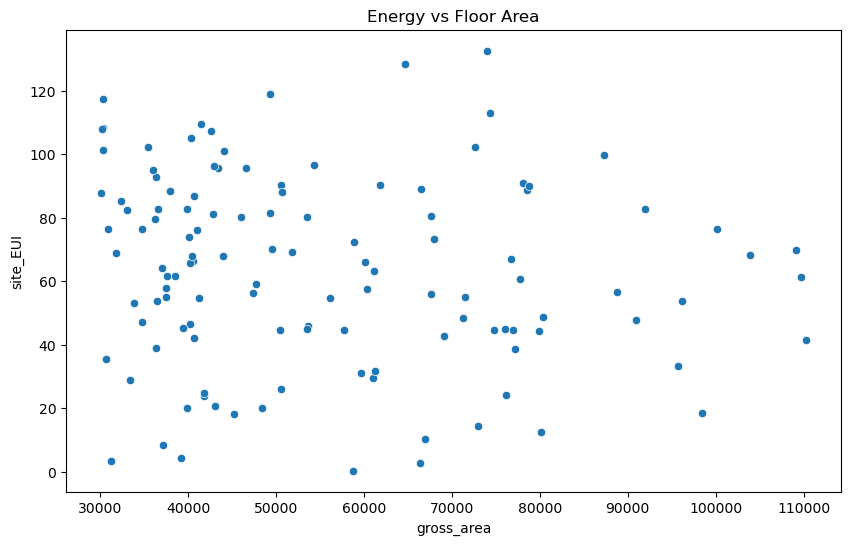

In [10]:
#clean EUI
upper = df_res_area['site_EUI'].quantile(0.9)
df_res_area = df_res_area[df_res_area['site_EUI']< upper]

# Scatter plot for Energy (kBtu) vs Floor Area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_res_area, x='gross_area', y='site_EUI')

plt.title('Energy vs Floor Area')
plt.xlabel('gross_area')
plt.ylabel('site_EUI')

plt.show()

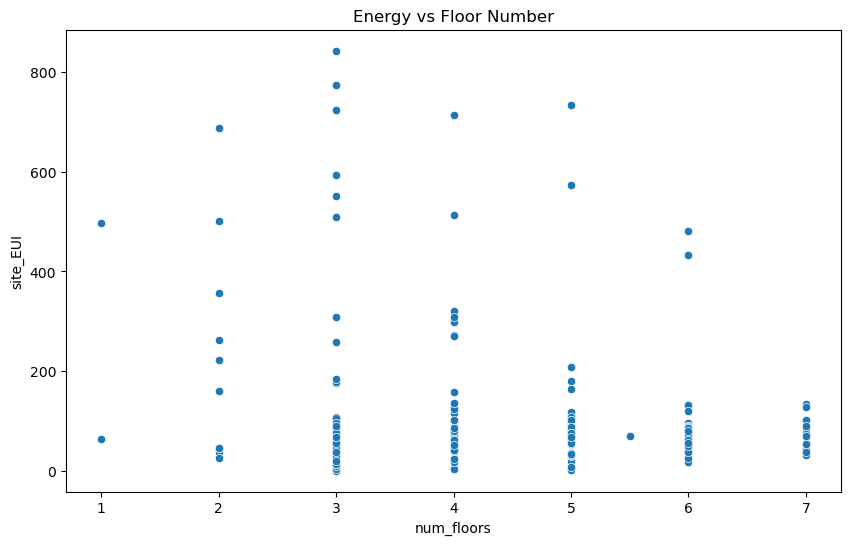

In [21]:
#clean EUI
upper = df_res_nf['site_EUI'].quantile(0.9)
df_res_nf = df_res_nf[df_res_nf['site_EUI']< upper]

# Scatter plot for Energy (kBtu) vs Floor Numbers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_res_nf, x='num_floors', y='site_EUI')

plt.title('Energy vs Floor Number')
plt.xlabel('num_floors')
plt.ylabel('site_EUI')

plt.show()

## 4. Visualization: examine relationships between variables

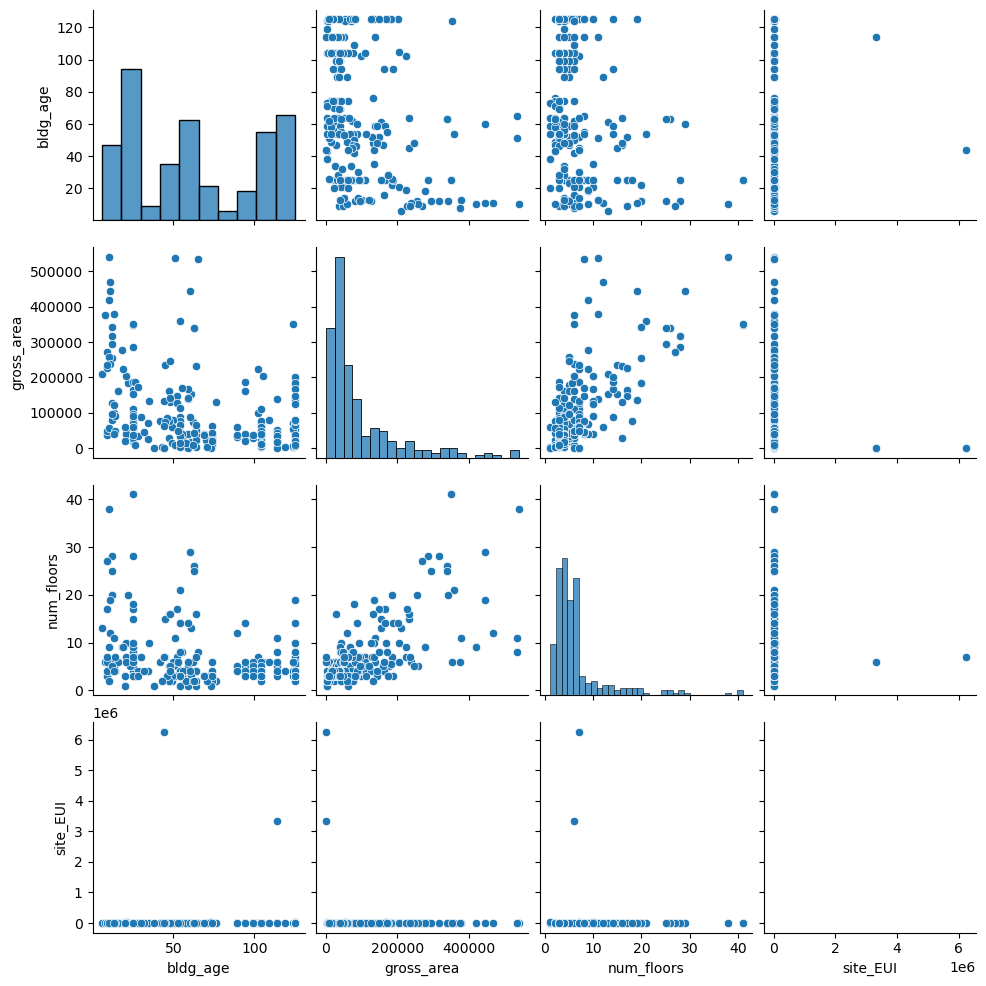

In [12]:
data = df_res[['bldg_age', 'gross_area', 'num_floors', 'site_EUI']]

sns.pairplot(data)
plt.show()

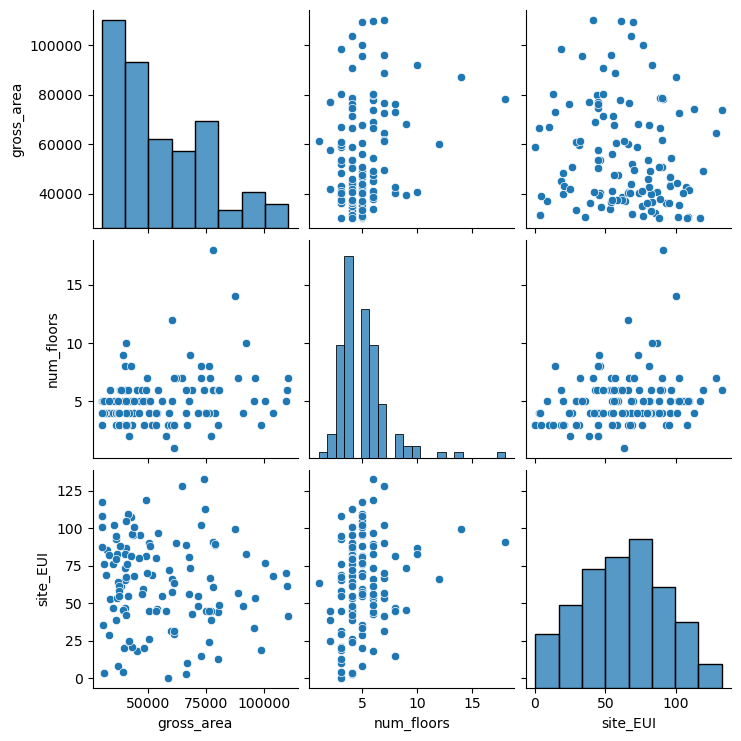

In [13]:
data = df_res_area[['gross_area', 'num_floors', 'site_EUI']]

sns.pairplot(data)
plt.show()

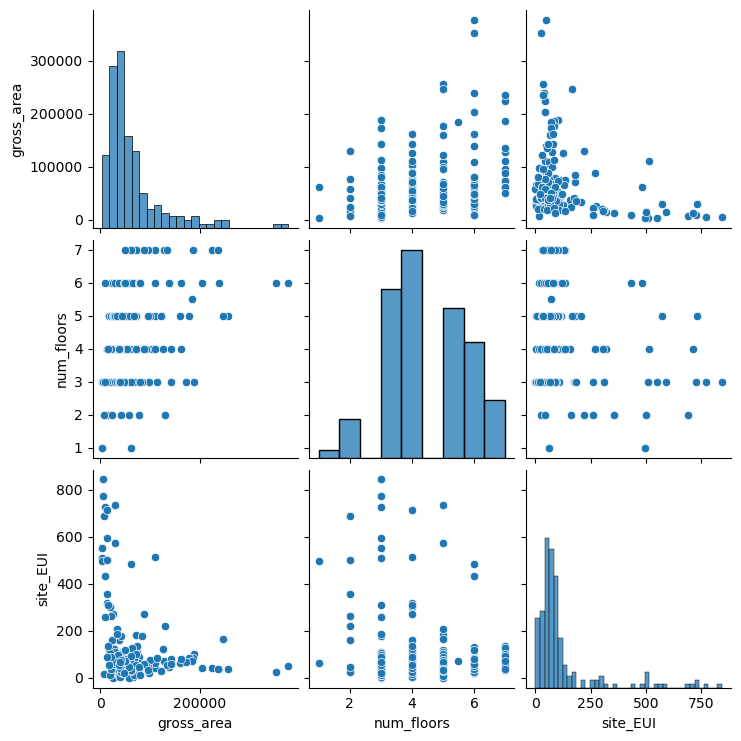

In [22]:
data = df_res_nf[['gross_area', 'num_floors', 'site_EUI']]

sns.pairplot(data)
plt.show()

### 1) using original set

In [23]:
# turning into catagorical data
import statsmodels.api as sm
bins = [0, 50000, 100000, float('inf')]
labels = ['Small', 'Medium', 'Large']
df_res['Building Size Category'] = pd.cut(df_res['gross_area'], bins=bins, labels=labels)
bin_counts = df_res['Building Size Category'].value_counts()
print("Counts per Building Size Category:")
print(bin_counts)

df_res = pd.get_dummies(df_res, columns=['Building Size Category'], drop_first=True)

Counts per Building Size Category:
Building Size Category
Small     138
Large      74
Medium     60
Name: count, dtype: int64


In [16]:
X = df_res[['bldg_age', 'num_floors', 'Building Size Category_Medium', 'Building Size Category_Large']]
y = df_res['site_EUI']

X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               site_EUI   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5511
Date:                Fri, 09 Feb 2024   Prob (F-statistic):              0.698
Time:                        00:08:39   Log-Likelihood:                -3911.9
No. Observations:                 272   AIC:                             7834.
Df Residuals:                     267   BIC:                             7852.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          5.409e+04   6.64e+04      0.814      0.416   -7.67e+04    1.85e+05
bldg_age                         29.8965    693.613      0.043      0.966   -1335.750    1395.543
num_floors                     3354.2521   5122.165      0.655      0.513   -6730.720    1.34e+04
Building Size Category_Medium -7.358e+04   6.69e+04     -1.100      0.272   -2.05e+05    5.81e+04
Building Size Category_Large   -9.71e+04   7.58e+04     -1.281      0.201   -2.46e+05    5.22e+04
==============================================================================
Omnibus:                      550.444   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           340591.444
Skew:                          12.807   Prob(JB):                         0.00
Kurtosis:                     174.453   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2) using floor area

In [17]:
# turning into catagorical data
import statsmodels.api as sm
bins = [0, 50000, 100000, float('inf')]
labels = ['Small', 'Medium', 'Large']
df_res_area['Building Size Category'] = pd.cut(df_res_area['gross_area'], bins=bins, labels=labels)
bin_counts = df_res_area['Building Size Category'].value_counts()
print("Counts per Building Size Category:")
print(bin_counts)

df_res_area = pd.get_dummies(df_res_area, columns=['Building Size Category'], drop_first=True)

Counts per Building Size Category:
Building Size Category
Small     63
Medium    54
Large      5
Name: count, dtype: int64


In [18]:
# Run the statsmodel
X = df_res_area[['bldg_age', 'num_floors', 'Building Size Category_Medium', 'Building Size Category_Large']]
y = df_res_area['site_EUI']

X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               site_EUI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.853
Date:                Fri, 09 Feb 2024   Prob (F-statistic):             0.0268
Time:                        00:08:39   Log-Likelihood:                -582.82
No. Observations:                 122   AIC:                             1176.
Df Residuals:                     117   BIC:                             1190.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            47.2752      8.404      5.625      0.000      30.631      63.919
bldg_age                          0.0323      0.069      0.468      0.641      -0.105       0.169
num_floors                        3.6618      1.199      3.053      0.003       1.287       6.037
Building Size Category_Medium   -10.6475      5.546     -1.920      0.057     -21.632       0.337
Building Size Category_Large     -4.8875     13.716     -0.356      0.722     -32.052      22.277
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.022
Skew:                          -0.019   Prob(JB):                        0.600
Kurtosis:                       2.553   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3) using floor levels

In [19]:
# turning into catagorical data
import statsmodels.api as sm
bins = [0, 50000, 100000, float('inf')]
labels = ['Small', 'Medium', 'Large']
df_res_nf['Building Size Category'] = pd.cut(df_res_nf['gross_area'], bins=bins, labels=labels)
bin_counts = df_res_nf['Building Size Category'].value_counts()
print("Counts per Building Size Category:")
print(bin_counts)

df_res_nf = pd.get_dummies(df_res_nf, columns=['Building Size Category'], drop_first=True)

Counts per Building Size Category:
Building Size Category
Small     132
Medium     53
Large      31
Name: count, dtype: int64


/var/folders/0q/ndh_pk0s37n95y6svtjfy7hw0000gp/T/ipykernel_5758/2404034909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res_nf['Building Size Category'] = pd.cut(df_res_nf['gross_area'], bins=bins, labels=labels)


In [20]:
# Run the statsmodel
X = df_res_nf[['bldg_age', 'num_floors', 'Building Size Category_Medium', 'Building Size Category_Large']]
y = df_res_nf['site_EUI']

X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               site_EUI   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.147
Date:                Fri, 09 Feb 2024   Prob (F-statistic):             0.0762
Time:                        00:08:39   Log-Likelihood:                -3127.8
No. Observations:                 216   AIC:                             6266.
Df Residuals:                     211   BIC:                             6282.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.806e+05    1.2e+05     -1.501      0.135   -4.18e+05    5.65e+04
bldg_age                        119.5476    855.630      0.140      0.889   -1567.130    1806.226
num_floors                     6.325e+04   2.33e+04      2.717      0.007    1.74e+04    1.09e+05
Building Size Category_Medium -1.203e+05   7.94e+04     -1.516      0.131   -2.77e+05    3.62e+04
Building Size Category_Large  -1.487e+05      1e+05     -1.480      0.140   -3.47e+05    4.93e+04
==============================================================================
Omnibus:                      415.622   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           150420.672
Skew:                          10.880   Prob(JB):                         0.00
Kurtosis:                     130.436   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""